In [ ]:
data <- read.csv('../data/meteo.csv', sep=';', nrows=100)

In [3]:
head(data)

,ID.OMM.station,Date,Pression.au.niveau.mer,Variation.de.pression.en.3.heures,Type.de.tendance.barométrique,Direction.du.vent.moyen.10.mn,Vitesse.du.vent.moyen.10.mn,Température,Point.de.rosée,Humidité,⋯,Altitude,communes..name.,communes..code.,EPCI..name.,EPCI..code.,department..name.,department..code.,region..name.,region..code.,mois_de_l_annee
,<int>,<chr>,<int>,<dbl>,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,⋯,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<int>
1,78925,2018-04-04T05:00:00+02:00,101420,60,1,100,3.6,298.45,295.15,82,⋯,3,Le Lamentin,97213,CA du Centre de la Martinique,249720061,Martinique,972,Martinique,2,4
2,61998,2018-04-05T05:00:00+02:00,101190,40,1,290,5.1,278.15,272.75,68,⋯,29,,,,NA,,,,NA,4
3,7690,2018-04-05T08:00:00+02:00,101240,-20,5,320,1.6,284.25,280.15,76,⋯,2,Nice,06088,Métropole Nice Côte d'Azur,200030195,Alpes-Maritimes,06,Provence-Alpes-Côte d'Azur,93,4
4,7149,2018-04-08T05:00:00+02:00,100730,-20,5,30,2.3,285.55,283.25,86,⋯,89,Athis-Mons,91027,Métropole du Grand Paris,200054781,Essonne,91,Île-de-France,11,4
5,7139,2018-04-10T05:00:00+02:00,99720,-150,6,170,2.8,283.25,282.05,92,⋯,143,Cerisé,61077,CU d'Alençon,246100663,Orne,61,Normandie,28,4
6,7790,2018-04-15T11:00:00+02:00,100890,-50,5,310,4.4,293.95,282.85,49,⋯,10,Lucciana,2b148,CC de Marana-Golo,200036499,Haute-Corse,2b,Corse,94,4


In [4]:
summary(data)

 ID.OMM.station      Date           Pression.au.niveau.mer
 Min.   : 7015   Length:100         Min.   : 98860        
 1st Qu.: 7149   Class :character   1st Qu.:100880        
 Median : 7460   Mode  :character   Median :101400        
 Mean   :20938                      Mean   :101428        
 3rd Qu.: 7758                      3rd Qu.:101975        
 Max.   :81415                      Max.   :103870        
                                    NA's   :5             
 Variation.de.pression.en.3.heures Type.de.tendance.barométrique
 Min.   :-960.000                  Min.   :0.000                
 1st Qu.: -50.000                  1st Qu.:1.000                
 Median :  10.000                  Median :3.000                
 Mean   :  -2.449                  Mean   :3.958                
 3rd Qu.:  87.500                  3rd Qu.:6.000                
 Max.   : 630.000                  Max.   :8.000                
 NA's   :2                         NA's   :5                    
 Directi

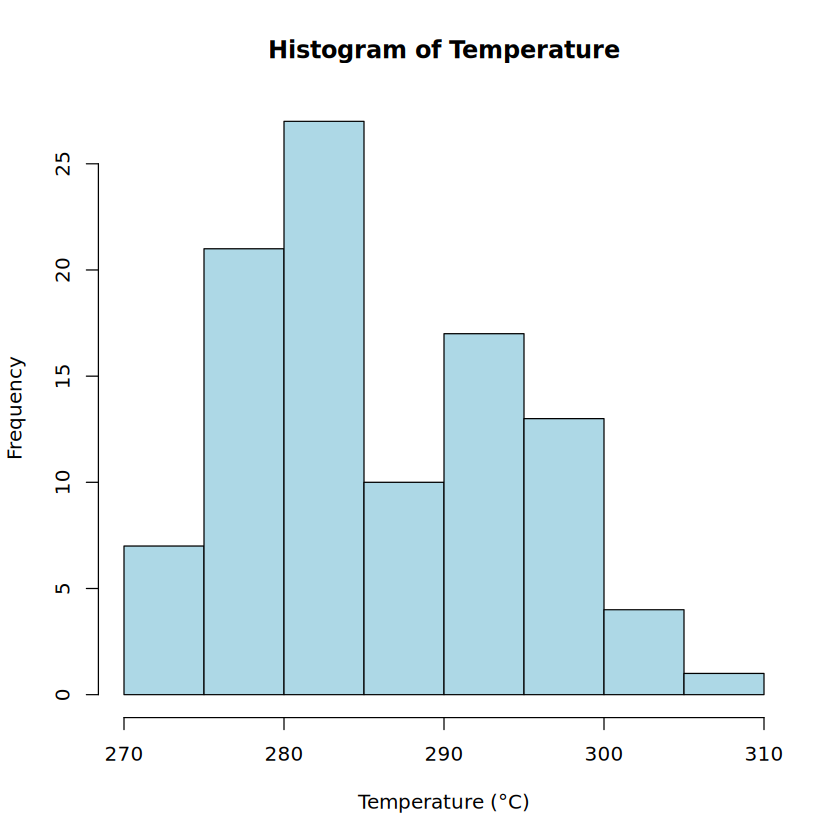

In [5]:
# par(bg = 'lightgrey')
par(bg = 'white')
hist(data$Température, main='Histogram of Temperature', xlab='Temperature (°C)', col='lightblue', border='black')

In [1]:
#  Load the CSV file into a data frame and choosing how many rows and columns

data <- read.csv("../data/observations.csv", header = TRUE, sep = ",")
print(dim(data))  # Print the dimensions of the data frame

# Check for missing values in the dataset per column and get a the missing values per column
missing_values <- colSums(is.na(data))
cat("Total missing values in the dataset per column:\n")
print(missing_values[missing_values > 0])

# Drop the columns if there is more than 30% of missing values
threshold <-  0.3 * nrow(data)
cols_to_drop <- names(missing_values[missing_values > threshold])
data_cleaned <- data[, !(names(data) %in% cols_to_drop)]
cat("Dropped columns with more than 30% missing values:\n")


write.csv(data_cleaned, "../data/observations_cleaned.csv", row.names = FALSE)

[1] 1719567      66
Total missing values in the dataset per column:
                                   Pression.au.niveau.mer 
                                                    94370 
                        Variation.de.pression.en.3.heures 
                                                    40694 
                            Type.de.tendance.barométrique 
                                                    68236 
                            Direction.du.vent.moyen.10.mn 
                                                    14843 
                              Vitesse.du.vent.moyen.10.mn 
                                                    14524 
                                              Température 
                                                    22176 
                                           Point.de.rosée 
                                                    32830 
                                                 Humidité 
                                               

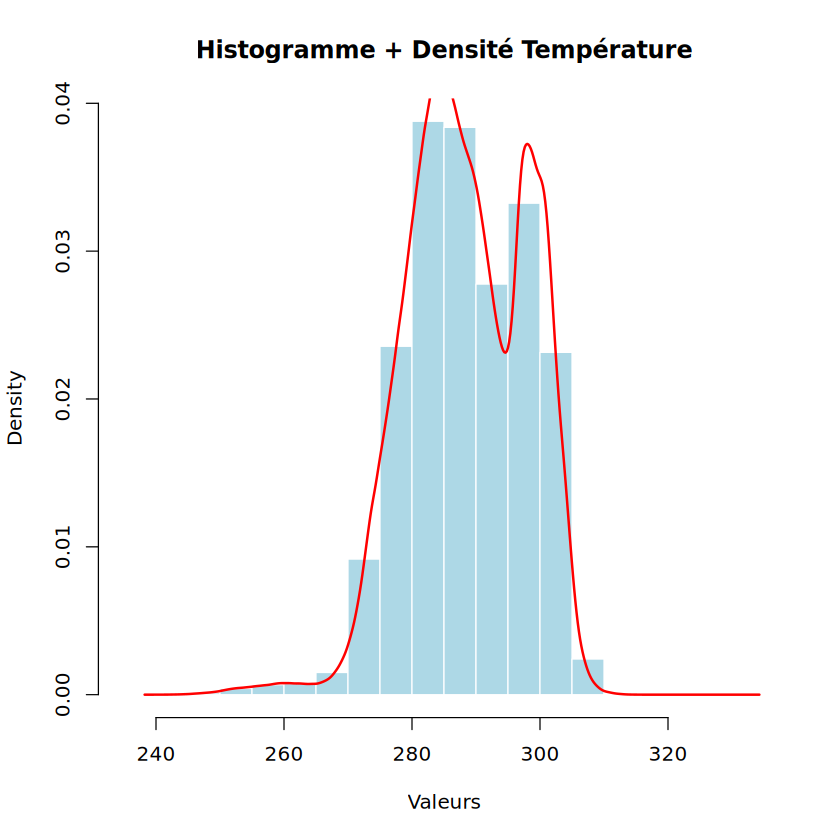

In [2]:
par(bg = "white")

# tracer la densité de Température
# Histogramme en densité
hist(na.omit(data_cleaned$Température), 
     col = "lightblue", 
     main = "Histogramme + Densité Température", 
     xlab = "Valeurs", 
     freq = FALSE,   # indispensable pour comparer avec density()
     border = "white")

# Superposer la courbe de densité
lines(density(na.omit(data_cleaned$Température)), 
      col = "red", 
      lwd = 2)


# ajouter une légende
# legend("topright", legend = c("Température", "Pression.station"), 
#        col = c("blue", "red"), lty = 1)


  # courbe ajoutée en rouge

# plot(density(data_cleaned$Pression.station), col = "blue")  # courbe principale en bleu
# lines(density(na.omit(data_cleaned$Pression.station)), col = "red")  # courbe ajoutée en rouge


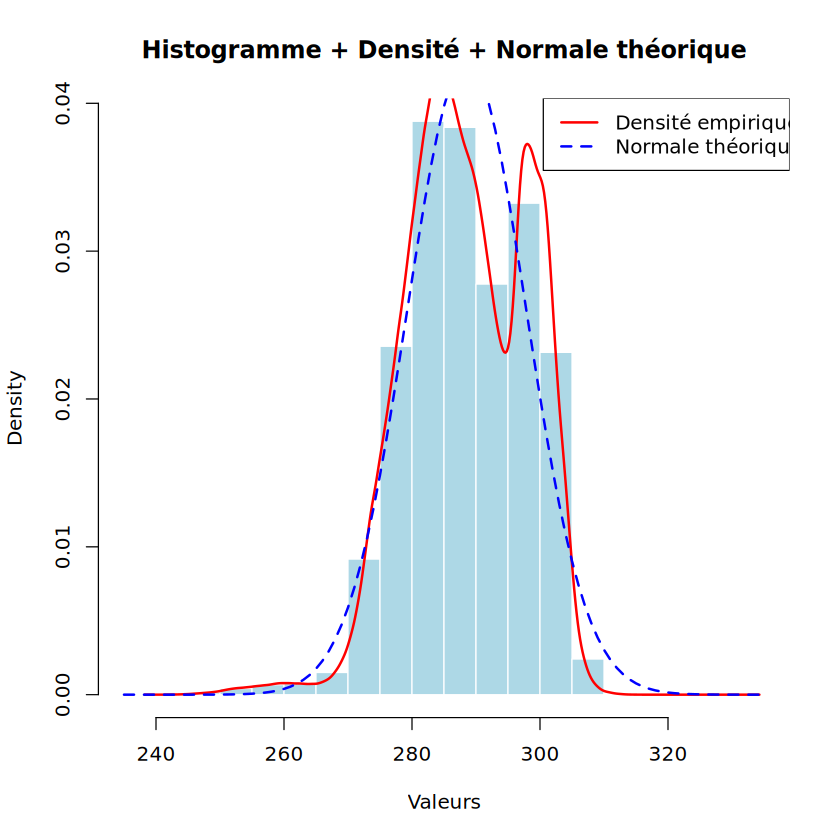

In [3]:
par(bg = "white")
# Transformation : sqrt(n) * (estimateur - moyenne) / ecart-type
# Histogramme en densité
hist(na.omit(data_cleaned$Température), 
     col = "lightblue", 
     main = "Histogramme + Densité + Normale théorique", 
     xlab = "Valeurs", 
     freq = FALSE, 
     border = "white")

# Densité empirique
lines(density(na.omit(data_cleaned$Température)), col = "red", lwd = 2)

# Courbe normale théorique (même moyenne et écart-type que les données)
curve(dnorm(x, 
            mean = mean(data_cleaned$Température, na.rm = TRUE), 
            sd = sd(data_cleaned$Température, na.rm = TRUE)), 
      add = TRUE, col = "blue", lwd = 2, lty = 2)

# Légende
legend("topright", 
       legend = c("Densité empirique", "Normale théorique"), 
       col = c("red", "blue"), lwd = 2, lty = c(1,2))


ERROR: Error in svd(x, nu = 0, nv = k): infinite or missing values in 'x'


In [ ]:
# summary(data_cleaned)
acp_body <- prcomp(data_cleaned)

# Quelques vérifications
cat("Classe de l'objet :", class(acp_body), "\n")
cat("Type de l'objet :", mode(acp_body), "\n")
cat("Test du type 'list' :", is.list(acp_body), "\n")

ERROR: Error in colMeans(x, na.rm = TRUE): 'x' must be numeric
